#  <span style="color:red">  Numerical Simulation 03</span>

## Exercise 03.1

In this exercise we want to use a Monte Carlo method to compute at time $t=0$ the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$. These options have a stochastic evolution of the asset price and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$. Indeed there is an exact solution fo the European options (Black and Scholes analytic solution) but we will use it only to check if our results are correct. 

The first thing to do to price the options is to caclulate the final asset price  $S(T)$, where $T$ is the delivery time, and, due to the fact that  $S\sim GBM(\mu,\sigma^2)$, we have two ways to do it:

1. Directly sampling the final asset price using  
$$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
where $W(t)\sim\mathcal{N}(0,t)$, and $S(0)$ is the initial price.


2. Arrive to $S(T)$ through a discretized sampling of the path of the asset price, dividing $[0,T]$ in $10^2$ time intervals and sampling discretized values of $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ using:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    with $Z_i \sim \mathcal{N}(0,1)$
    
Once we have computed the asset price $S(T)$ we have to bring it back to $t=0$ to calculate the price of the option, and here we have the difference between the put and the call options. Indeed:
- **Put option**  $$P[S(0),0]=\exp(-rT) max[0,K-S(T)]$$
- **Call option** $$C[S(0),0]=\exp(-rT) max[0,S(T)-K]$$


I've used the following parameters to price both options in both ways. 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

I've done these simulations $M=10^5$ times using the blocking methods to calculate uncertainties (I've divided my steps in $N=100$ blocks) and then plotted the results. I've signed with a black line the expectation value, computed with the analytic solution, and all of the four plots show compatibility with these values.

At the end of this Jupyter I've reported Black and Scholes analytic solution, and its Pyton implementation so it's possible to check the expectation values, and, eventually, to caluclate new expectation values, with different parameters (in this case it's necessary to re-run the simulation changing also the parameters in the c++ code).

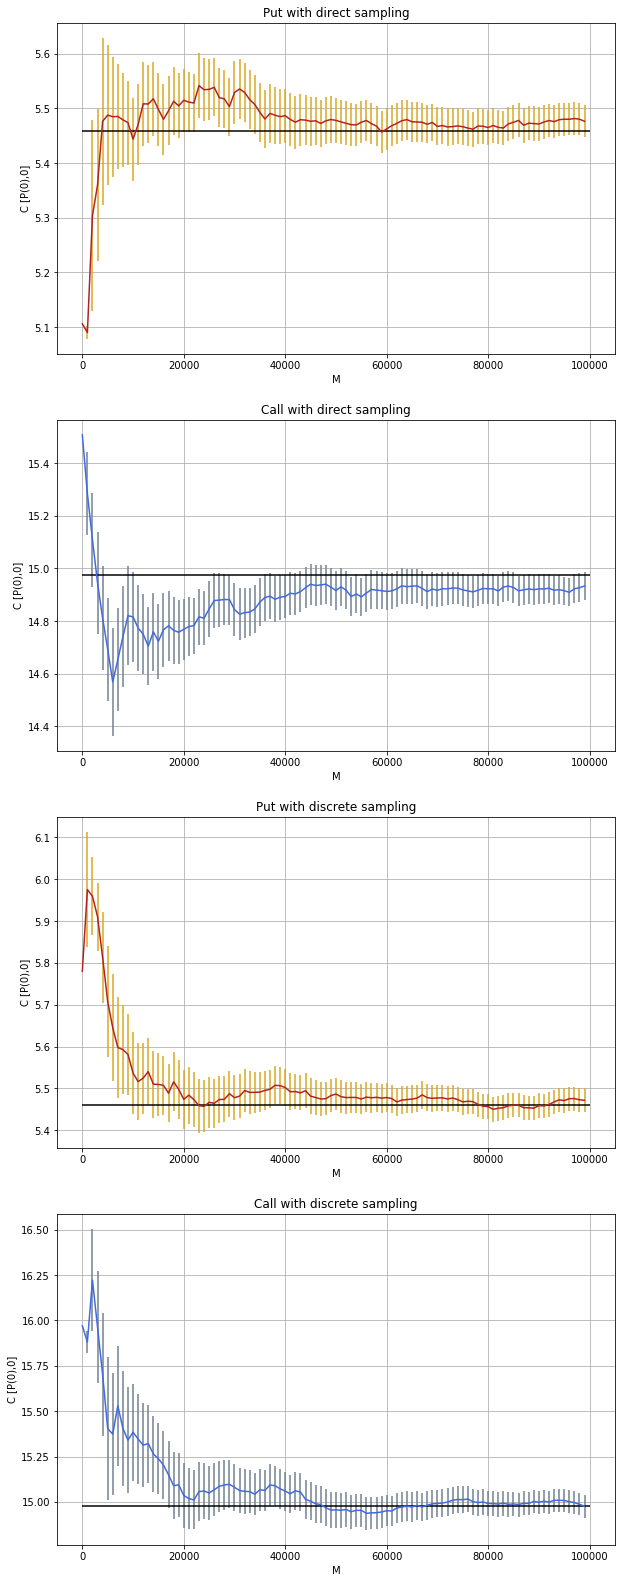

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(100)
x*=1000

C,err=np.loadtxt("DirectPut.dat",unpack=True)
fig=plt.figure(figsize=(10,28))
plt.subplot(411)
plt.errorbar(x, C, yerr=err, color="firebrick", ecolor="goldenrod")
plt.xlabel('M')
plt.hlines(5.4595325819072364,0,100000)
plt.ylabel('C [P(0),0]')
plt.title("Put with direct sampling")
plt.grid(True)

plt.subplot(412)
C,err=np.loadtxt("DirectCall.dat",unpack=True)
plt.errorbar(x, C, yerr=err, color="royalblue",ecolor="slategrey")
plt.xlabel('M')
plt.hlines(14.975790778311286,0,100000)
plt.ylabel('C [P(0),0]')
plt.title("Call with direct sampling")
plt.grid(True)

plt.subplot(413)
C,err=np.loadtxt("DiscretePut.dat",unpack=True)
plt.errorbar(x, C, yerr=err,color="firebrick", ecolor="goldenrod")
plt.xlabel('M')
plt.hlines(5.4595325819072364,0,100000)
plt.ylabel('C [P(0),0]')
plt.title("Put with discrete sampling")
plt.grid(True)

plt.subplot(414)
C,err=np.loadtxt("DiscreteCall.dat",unpack=True)
plt.errorbar(x, C, yerr=err, color="royalblue",ecolor="slategrey")
plt.xlabel('M')
plt.hlines(14.975790778311286,0,100000)
plt.ylabel('C [P(0),0]')
plt.title("Call with discrete sampling")
plt.grid(True)
plt.show()

## Black-Scholes analytic solution:

Black-Scholes analytic solution for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ C\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

In [19]:
import scipy
from scipy.special import erf
from scipy import log, exp, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364
